# User Interface
This section serves as a demonstration on how to use ExpansionSuite code to solve recursive models. Users are given the flexibility of using parameters different from the default setting. Users simply have to enter the parameters in the user interface in section 2.1 below. Following the user interface, we also provide a detailed instruction on using the ExpansionSuite Code in section 2.2, in case a user may want to use the code elsewhere.

In [1]:
from jupyterWidgets import *
from plotting_module import *

import warnings
warnings.filterwarnings('ignore') # Occasionally our root finder  will try to take the log
# of a negative number, but this is not fatal (we still can get the desired root), so we turn off this warning.
display(fixed_params_Panel)

In [11]:
A = np.array([[np.exp(-beta_1.value),0],[0,np.exp(-beta_2.value)]])
B = np.array([[B11.value, B12.value, B13.value],[B21.value, B22.value, B23.value]]) * .01
σ_k = np.array([sigk1.value, sigk2.value, sigk3.value]) * .01
U_k = np.array([U_k1.value, U_k2.value])
σ_d = np.array([sigd1.value, sigd2.value, sigd3.value]) * .01
U_d = np.array([U_d1.value, U_d2.value])
# Read key variables
γ = gamma.value
χ = chi.value
α = alpha.value
ϵ = epsilon.value

## Simulate paths using parameters given above

Users are able to select multiple variables of interest by holding shift and/or ctrl (or command) pressed and then mouse click variable names. Please first press `Update parameters` and then press `Run simulation`.

The **dashed** curves indicate deterministic growth path (with both shocks being 0 at every period), and the **solid** curves indicate stochastic growth path (with randomly generated standard normal shock at every period).

In [3]:
if habit.value == 1:
    display(simulate_box_no_habit_run)
elif habit.value == 3:
    display(simulate_box_internal_habit_run)

<IPython.core.display.Javascript object>

Parameter check passed.
Running simulation...


<IPython.core.display.Javascript object>

In [9]:
if habit.value == 1:
    all_var_names = ['V/C', 'R/C', 'C/K', 'I/K', 'K_{t+1}/K_t', 'Z1', 'Z2']
    selected_index = [all_var_names.index(element) for element in simulate_no_habit.value]
elif habit.value == 3:
    all_var_names = ['V/H', 'R/H', 'U/H', 'C/K', 'I/K', 'MH/MU',\
                                'MC/MU','H/K','K_{t+1}/K_t', 'Z1', 'Z2']
    selected_index = [all_var_names.index(element) for element in simulate_internal_habit.value]

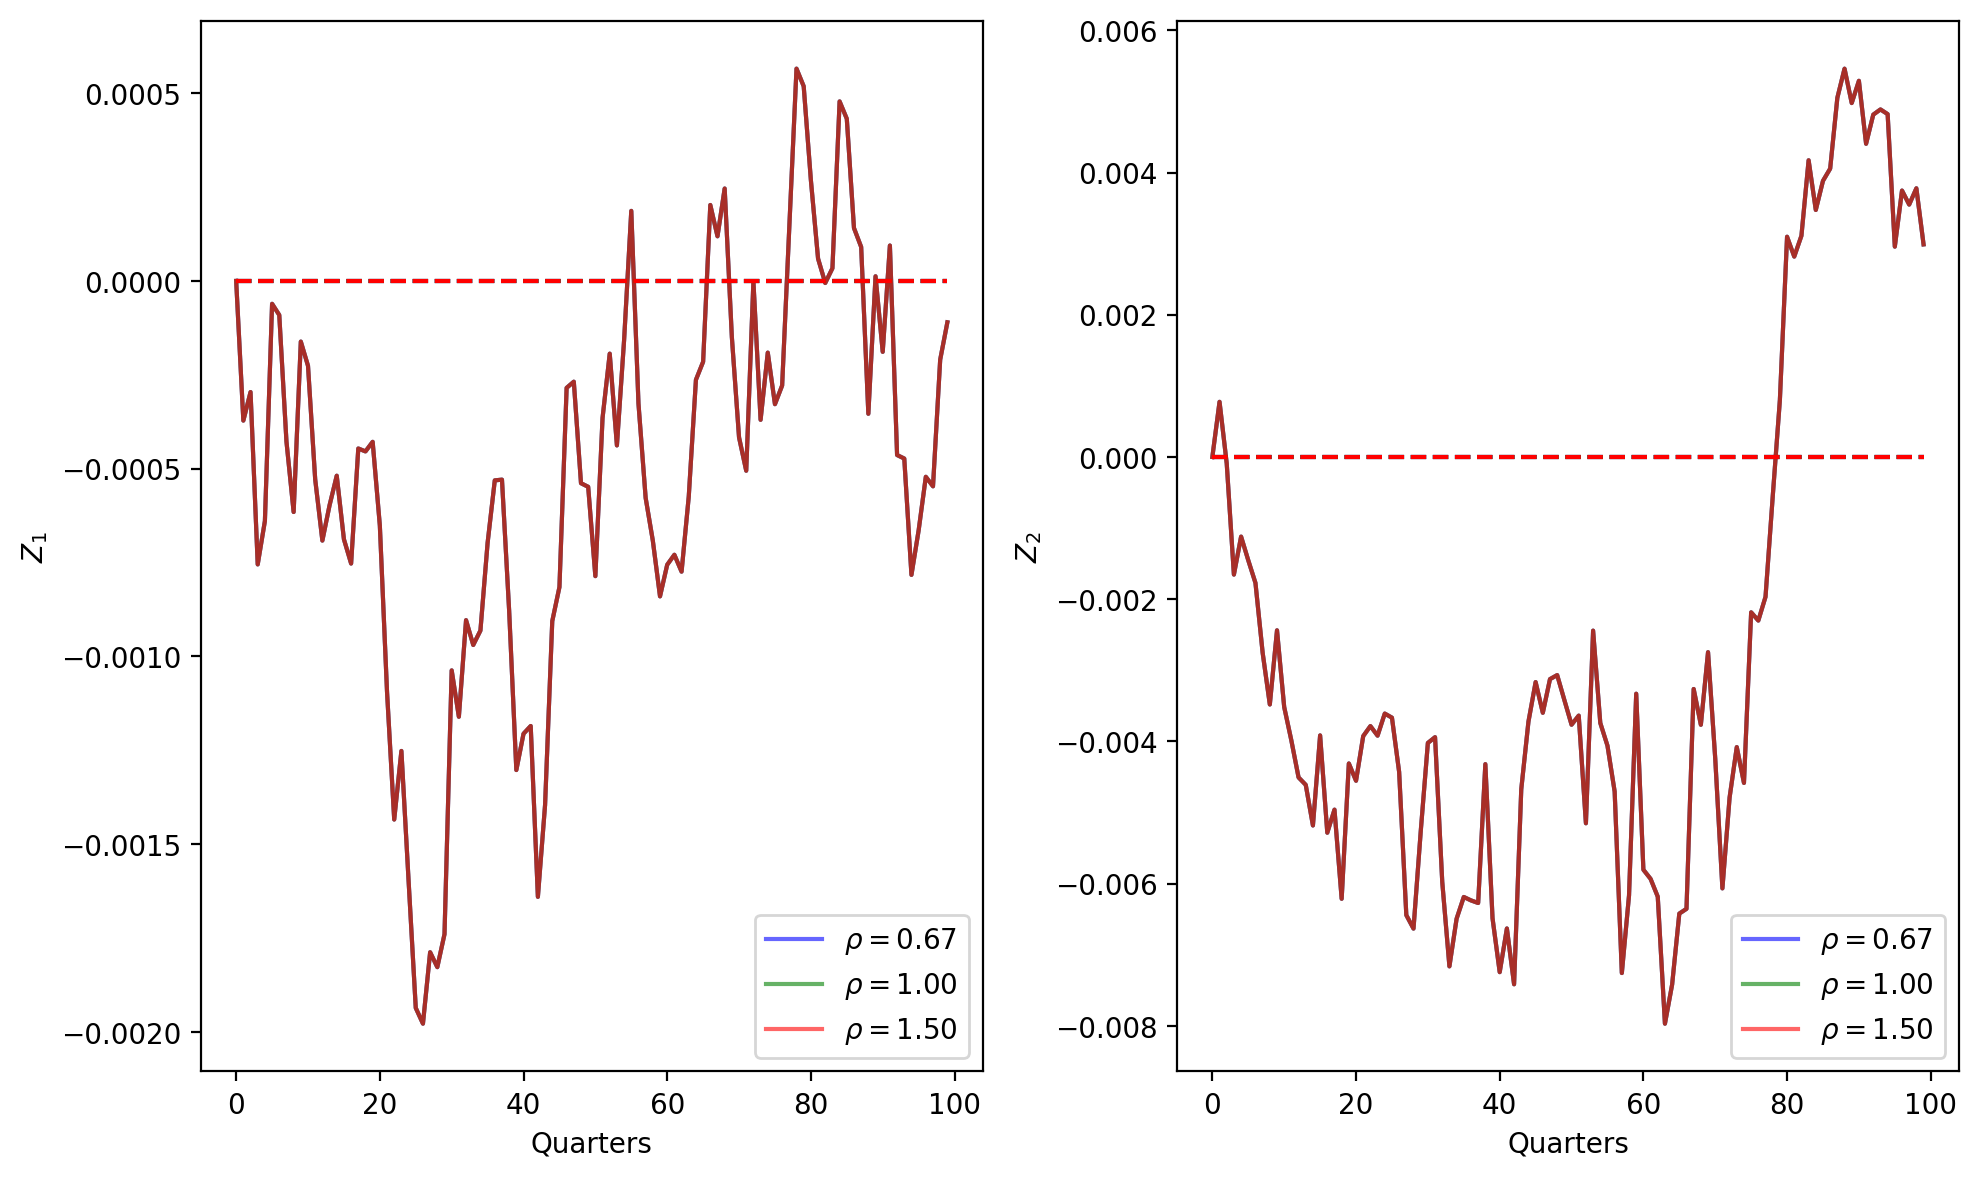

In [10]:
fig, ax, solved_models = plot_simulation([np.float(r) for r in rhos.value.split(',')], timeHorizon.value, \
                          phi1.value, phi2.value, alpha_k.value, productivity.value, delta.value, \
                          A, B, U_k, σ_k, U_d, σ_d, int(order.value), γ, habit.value, χ, α, ϵ, selected_index)
plt.tight_layout()
plt.show()

In [6]:
display(slider_box_run)

<IPython.core.display.Javascript object>

Parameter check passed.
Running models...


<IPython.core.display.Javascript object>

## Impulse responses with a slider parameter

In [12]:
# Generate slider variables
if habit.value == 1:
    slider_object = slider_var_γ_only
else:
    slider_object = slider_var
slider_vars = list(np.arange(slider_min.value,slider_max.value,slider_step.value)) + [slider_max.value]
if slider_object.value == 'γ':
    γ = slider_vars
elif slider_object.value == 'χ':
    χ = slider_vars
elif slider_object.value == 'α':
    α = slider_vars
elif slider_object.value == 'ϵ':
    ϵ = slider_vars

if conf_int.value == 0 or habit.value == 1:
    conf_interval = None
else:
    conf_interval = conf_int.value
    
    
fig1, solved_models = plot_impulse([np.float(r) for r in rhos.value.split(',')], \
                             timeHorizon.value, phi1.value, \
                             phi2.value, alpha_k.value, productivity.value, delta.value, A, B, \
                             U_k, σ_k, U_d, σ_d, int(order.value), γ, slider_object.value, habit.value, χ, α, ϵ, 
                             shock = int(shock.value), title = plotName.value+", Shock {}", \
                             confidence_interval=conf_interval)
fig1.show()